## Logistic Classification for IMDB : Keras

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### function for text processing

In [2]:
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

### Step 1. Data

In [3]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)
print(train_data.shape)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### Data processing, Training/Test Data

In [4]:
# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Step 2. Logistic Classification Model (input = 10000, output = 1 with sigmoid function)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=10000, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 10001     
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________


### Step 3. Loss,Optimizer, Metric

In [6]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Step 4. Train the model

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    verbose=2,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 - 1s - loss: 0.6169 - accuracy: 0.7417 - val_loss: 0.5626 - val_accuracy: 0.8194
Epoch 2/20
30/30 - 0s - loss: 0.5183 - accuracy: 0.8483 - val_loss: 0.4988 - val_accuracy: 0.8416
Epoch 3/20
30/30 - 0s - loss: 0.4564 - accuracy: 0.8692 - val_loss: 0.4526 - val_accuracy: 0.8552
Epoch 4/20
30/30 - 0s - loss: 0.4103 - accuracy: 0.8832 - val_loss: 0.4186 - val_accuracy: 0.8642
Epoch 5/20
30/30 - 0s - loss: 0.3744 - accuracy: 0.8929 - val_loss: 0.3927 - val_accuracy: 0.8691
Epoch 6/20
30/30 - 0s - loss: 0.3459 - accuracy: 0.9021 - val_loss: 0.3728 - val_accuracy: 0.8733
Epoch 7/20
30/30 - 0s - loss: 0.3227 - accuracy: 0.9083 - val_loss: 0.3556 - val_accuracy: 0.8780
Epoch 8/20
30/30 - 0s - loss: 0.3032 - accuracy: 0.9135 - val_loss: 0.3426 - val_accuracy: 0.8795
Epoch 9/20
30/30 - 0s - loss: 0.2867 - accuracy: 0.9183 - val_loss: 0.3314 - val_accuracy: 0.8825
Epoch 10/20
30/30 - 0s - loss: 0.2724 - accuracy: 0.9222 - val_loss: 0.3225 - val_accuracy: 0.8839
Epoch 11/20
30/30 -

In [8]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Plot the Training/Validation loss

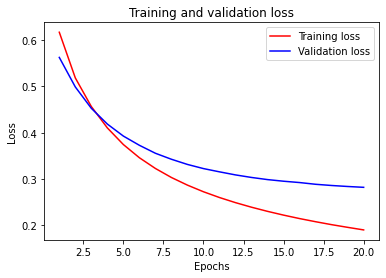

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'r', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plot the Training/Validation Accuracy

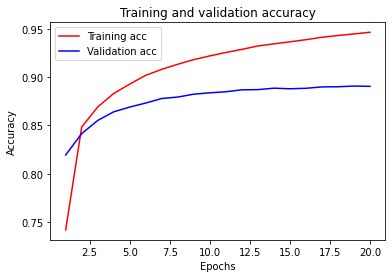

In [10]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Step 5. Test the model

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_loss = ',test_loss, 'test_acc = ',test_acc)

782/782 [==============================] - 1s 1ms/step - loss: 0.2974 - accuracy: 0.8839
test_loss =  0.29740479588508606 test_acc =  0.8838800191879272
